## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Mounted at /content/drive/


In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/MyDrive/Cats_and_Dogs/train'
val =   '/content/drive/MyDrive/Cats_and_Dogs/val'
test =  '/content/drive/MyDrive/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 1500
# test set size
nb_test_samples = 1500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20070 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [5]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten()) 
# 8:  +Dense
model.add(Dense(64))
#     +ReLu
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

Mymodel_10 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-7-58a923bd0a3c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Mymodel_10 = model.fit_generator(


Epoch 1/10
312/312 [==============================] - 2643s 8s/step - loss: 0.6002 - accuracy: 0.6722 - val_loss: 0.5474 - val_accuracy: 0.7235
Epoch 2/10
312/312 [==============================] - 242s 776ms/step - loss: 0.4925 - accuracy: 0.7666 - val_loss: 0.4587 - val_accuracy: 0.7806
Epoch 3/10
312/312 [==============================] - 148s 476ms/step - loss: 0.4330 - accuracy: 0.8011 - val_loss: 0.4552 - val_accuracy: 0.7779
Epoch 4/10
312/312 [==============================] - 120s 385ms/step - loss: 0.3796 - accuracy: 0.8316 - val_loss: 0.3765 - val_accuracy: 0.8336
Epoch 5/10
312/312 [==============================] - 111s 355ms/step - loss: 0.3396 - accuracy: 0.8520 - val_loss: 0.3758 - val_accuracy: 0.8220
Epoch 6/10
312/312 [==============================] - 104s 335ms/step - loss: 0.2968 - accuracy: 0.8740 - val_loss: 0.3656 - val_accuracy: 0.8444
Epoch 7/10
312/312 [==============================] - 100s 320ms/step - loss: 0.2528 - accuracy: 0.8946 - val_loss: 0.4453 - v

In [8]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-8-f790ba523922>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 83.49%


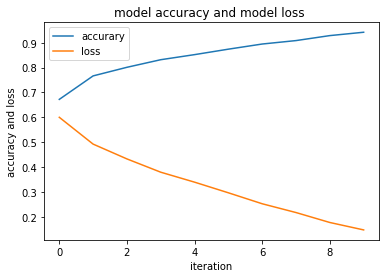

In [11]:
import matplotlib.pyplot as plt
plt.plot(Mymodel_10.history['accuracy'],label='accurary')
plt.title('model accuracy and model loss ')
plt.ylabel('accuracy and loss')
plt.xlabel('iteration')
plt.plot(Mymodel_10.history['loss'],label='loss')
plt.legend()
plt.show()

In [12]:
Mymodel_15 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-12-c94b7d2c5bee>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Mymodel_15 = model.fit_generator(


Epoch 1/10
312/312 [==============================] - 101s 324ms/step - loss: 0.1303 - accuracy: 0.9493 - val_loss: 0.4405 - val_accuracy: 0.8370
Epoch 2/10
312/312 [==============================] - 95s 304ms/step - loss: 0.1093 - accuracy: 0.9576 - val_loss: 0.4985 - val_accuracy: 0.8424
Epoch 3/10
312/312 [==============================] - 99s 318ms/step - loss: 0.0928 - accuracy: 0.9619 - val_loss: 0.4737 - val_accuracy: 0.8499
Epoch 4/10
312/312 [==============================] - 96s 307ms/step - loss: 0.0766 - accuracy: 0.9703 - val_loss: 0.6200 - val_accuracy: 0.8444
Epoch 5/10
312/312 [==============================] - 95s 304ms/step - loss: 0.0808 - accuracy: 0.9669 - val_loss: 0.5743 - val_accuracy: 0.8505
Epoch 6/10
312/312 [==============================] - 96s 307ms/step - loss: 0.0631 - accuracy: 0.9755 - val_loss: 0.6095 - val_accuracy: 0.8471
Epoch 7/10
312/312 [==============================] - 98s 314ms/step - loss: 0.0656 - accuracy: 0.9738 - val_loss: 0.5506 - val_a

In [13]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-13-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 84.71%


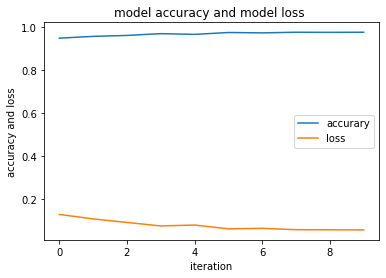

In [14]:
plt.plot(Mymodel_15.history['accuracy'],label='accurary')
plt.title('model accuracy and model loss ')
plt.ylabel('accuracy and loss')
plt.xlabel('iteration')
plt.plot(Mymodel_15.history['loss'],label='loss')
plt.legend()
plt.show()

In [15]:
Mymodel_20 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-15-4a101eba5027>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Mymodel_20 = model.fit_generator(


Epoch 1/10
312/312 [==============================] - 99s 318ms/step - loss: 0.0507 - accuracy: 0.9805 - val_loss: 0.7262 - val_accuracy: 0.8438
Epoch 2/10
312/312 [==============================] - 97s 310ms/step - loss: 0.0530 - accuracy: 0.9780 - val_loss: 0.8486 - val_accuracy: 0.8288
Epoch 3/10
312/312 [==============================] - 95s 304ms/step - loss: 0.0540 - accuracy: 0.9790 - val_loss: 0.8456 - val_accuracy: 0.8404
Epoch 4/10
312/312 [==============================] - 94s 300ms/step - loss: 0.0473 - accuracy: 0.9808 - val_loss: 0.8564 - val_accuracy: 0.8478
Epoch 5/10
312/312 [==============================] - 95s 305ms/step - loss: 0.0515 - accuracy: 0.9792 - val_loss: 0.8767 - val_accuracy: 0.8370
Epoch 6/10
312/312 [==============================] - 97s 311ms/step - loss: 0.0377 - accuracy: 0.9845 - val_loss: 0.8896 - val_accuracy: 0.8505
Epoch 7/10
312/312 [==============================] - 99s 317ms/step - loss: 0.0409 - accuracy: 0.9835 - val_loss: 1.0024 - val_ac

In [16]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-16-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 84.17%


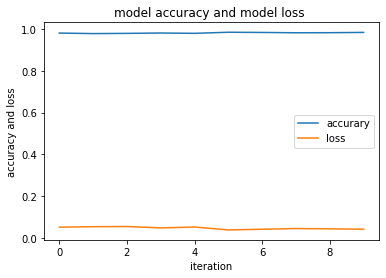

In [17]:
plt.plot(Mymodel_20.history['accuracy'],label='accurary')
plt.title('model accuracy and model loss ')
plt.ylabel('accuracy and loss')
plt.xlabel('iteration')
plt.plot(Mymodel_20.history['loss'],label='loss')
plt.legend()
plt.show()

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

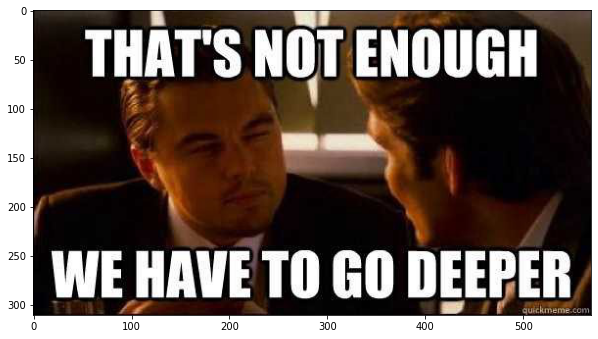

In [18]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [19]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [20]:
# add layers to VGG16:

model_vgg16_net = Sequential()
model_vgg16_net.add(vgg16_net)

# + flattening
model_vgg16_net.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model_vgg16_net.add(Dense(256))
# + ReLu
model_vgg16_net.add(Activation('relu'))
# + Dropout
model_vgg16_net.add(Dropout(0.5))
# + Dense layer with 1 neuron
model_vgg16_net.add(Dense(1))
# + sigmoid
model_vgg16_net.add(Activation('sigmoid'))

model_vgg16_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

In [21]:
model_vgg16_net.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


E.g., it was like:


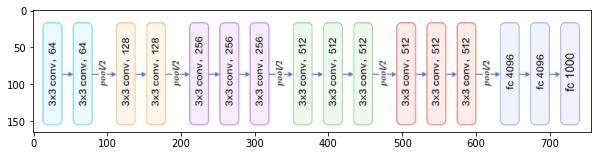

In [22]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

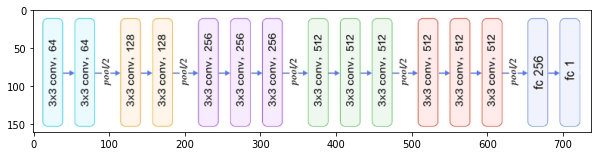

In [23]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [24]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

generator_model_vgg16_net =  model_vgg16_net.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-24-9315c233bfa5>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  generator_model_vgg16_net =  model_vgg16_net.fit_generator(


Epoch 1/5
312/312 [==============================] - 105s 323ms/step - loss: 0.4989 - accuracy: 0.7502 - val_loss: 0.3441 - val_accuracy: 0.8662
Epoch 2/5
312/312 [==============================] - 99s 318ms/step - loss: 0.3383 - accuracy: 0.8530 - val_loss: 0.2926 - val_accuracy: 0.8852
Epoch 3/5
312/312 [==============================] - 101s 323ms/step - loss: 0.2953 - accuracy: 0.8752 - val_loss: 0.2630 - val_accuracy: 0.8961
Epoch 4/5
312/312 [==============================] - 111s 356ms/step - loss: 0.2715 - accuracy: 0.8872 - val_loss: 0.2432 - val_accuracy: 0.9015
Epoch 5/5
312/312 [==============================] - 107s 342ms/step - loss: 0.2563 - accuracy: 0.8916 - val_loss: 0.2503 - val_accuracy: 0.9029


In [25]:
scores = model_vgg16_net.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-25-0ae885aa0464>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_vgg16_net.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 88.52%


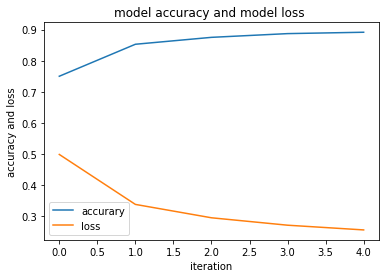

In [28]:
plt.plot(generator_model_vgg16_net.history['accuracy'],label='accurary')
plt.title('model accuracy and model loss ')
plt.ylabel('accuracy and loss')
plt.xlabel('iteration')
plt.plot(generator_model_vgg16_net.history['loss'],label='loss')
plt.legend()
plt.show()

In [38]:
from keras.applications import ResNet50
model_ResNet50 = ResNet50(weights='imagenet', 
                  include_top=False,     
                  input_shape=(150, 150, 3))

model_ResNet50.trainable = False              
model_ResNet50.summary()  

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [39]:
Mymodel_ResNet50 = Sequential()
Mymodel_ResNet50.add(model_ResNet50)
# + flattening
Mymodel_ResNet50.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
Mymodel_ResNet50.add(Dense(256))
# + ReLu
Mymodel_ResNet50.add(Activation('relu'))
# + Dropout
Mymodel_ResNet50.add(Dropout(0.5))
# + Dense layer with 1 neuron
Mymodel_ResNet50.add(Dense(1))
# + sigmoid
Mymodel_ResNet50.add(Activation('sigmoid'))

Mymodel_ResNet50.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_8 (Activation)   (None, 1)                

In [43]:
Mymodel_ResNet50.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.00001), 
              metrics=['accuracy'])

In [44]:
generator_ResNet50 = Mymodel_ResNet50.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

<ipython-input-44-ee71df436f38>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  generator_ResNet50 = Mymodel_ResNet50.fit_generator(


Epoch 1/5
312/312 [==============================] - 107s 329ms/step - loss: 0.6826 - accuracy: 0.5725 - val_loss: 0.6466 - val_accuracy: 0.6311
Epoch 2/5
312/312 [==============================] - 103s 331ms/step - loss: 0.6461 - accuracy: 0.6257 - val_loss: 0.6282 - val_accuracy: 0.6413
Epoch 3/5
312/312 [==============================] - 100s 321ms/step - loss: 0.6327 - accuracy: 0.6487 - val_loss: 0.6184 - val_accuracy: 0.6644
Epoch 4/5
312/312 [==============================] - 104s 332ms/step - loss: 0.6216 - accuracy: 0.6572 - val_loss: 0.6061 - val_accuracy: 0.6848
Epoch 5/5
312/312 [==============================] - 104s 334ms/step - loss: 0.6141 - accuracy: 0.6644 - val_loss: 0.5989 - val_accuracy: 0.6875


In [46]:
scores2 = Mymodel_ResNet50.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores2[1]*100))

<ipython-input-46-0606d1aaf1ba>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores2 = Mymodel_ResNet50.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 71.20%


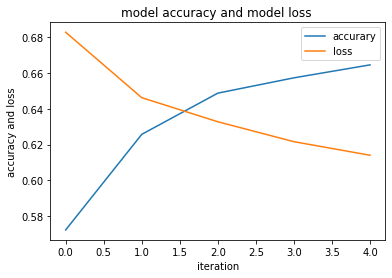

In [47]:
plt.plot(generator_ResNet50.history['accuracy'],label='accurary')
plt.title('model accuracy and model loss ')
plt.ylabel('accuracy and loss')
plt.xlabel('iteration')
plt.plot(generator_ResNet50.history['loss'],label='loss')
plt.legend()
plt.show()

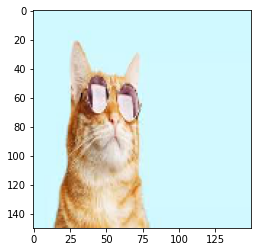

In [75]:
cat = image.load_img('/content/drive/My Drive/Kitten.jpg', target_size=(150, 150))
plt.imshow(cat)

In [76]:
Cat = image.img_to_array(cat)
Cat = np.expand_dims(Cat, axis=0)
cat_feature = np.vstack([Cat])

In [77]:
cat_pred = model.predict(cat_feature, batch_size=1)
result = 'cat' if cat_pred < 0.5 else 'dog'
print(f'first model predicted cat as: {result}')

1/1 [==============================] - 0s 201ms/step
first model predicted cat as: cat


In [78]:
cat_pred = model_vgg16_net.predict(cat_feature)
result = 'cat' if cat_pred < 0.5 else 'dog'
print(f'first model predicted cat as: {result}')

1/1 [==============================] - 1s 1s/step
first model predicted cat as: dog


In [80]:
cat_pred = Mymodel_ResNet50.predict(cat_feature)
result = 'cat' if cat_pred < 0.5 else 'dog'
print(f'first model predicted cat as: {result}')

1/1 [==============================] - 1s 1s/step
first model predicted cat as: dog
